In [2]:
 #load package
 using Revise
 using Plots
 using LaTeXStrings
 using LinearAlgebra
 using SparseIR
 using Nevanlinna

[ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]


In [3]:
# Set work data Type
T = BigFloat
setprecision(2048)

2048

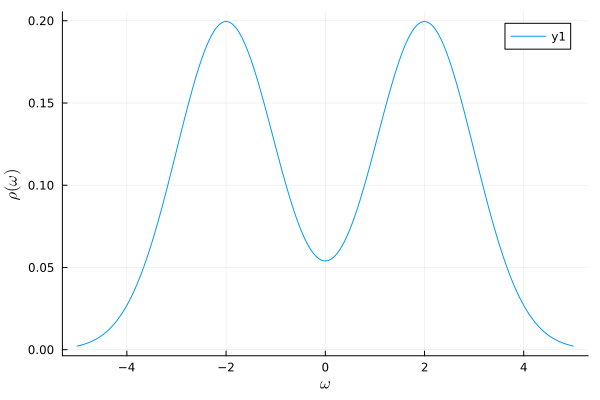

In [6]:
 #define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
#rho(omega) = gaussian(omega, 0.0, 1.0)
rho(omega) = 0.5*gaussian(omega, 2.0, 1.0) + 0.5*gaussian(omega, -2.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [7]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [8]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [10]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [11]:
#moments = Complex{T}.([1, 0, 1, 0, 3, 0, 15, 0, 105, 0, 945])
#moments = Complex{T}.([1, 0, 1])
#moments = Complex{T}.([1])

#moments = Complex{T}.([1, 0, 5, 0, 43, 0, 499, 0, 7193, 0, 123109, 0, 2430355, 0, 54229907])
moments = Complex{T}.([1, 0, 5, 0, 43])

5-element Vector{Complex{BigFloat}}:
  1.0 + 0.0im
  0.0 + 0.0im
  5.0 + 0.0im
  0.0 + 0.0im
 43.0 + 0.0im

In [13]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:3
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 30


In [ ]:
#ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)

In [14]:
#Nevanlinna.solve!(ham_nev_sol)

In [15]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)

N_imag is setted as 33


NevanlinnaSolver{BigFloat}(ImagDomainData{BigFloat}(33, Complex{BigFloat}[0.0 + 12.9119458062540513054727853159420192241668701171875im, 0.0 + 11.2154857733155619570197814027778804302215576171875im, 0.0 + 9.707521299592460906069391057826578617095947265625im, 0.0 + 8.450884238156543659670205670408904552459716796875im, 0.0 + 7.31991088286421831554662276175804436206817626953125im, 0.0 + 6.37743308678728038074723372119478881359100341796875im, 0.0 + 5.5606189968539343482234471593983471393585205078125im, 0.0 + 4.80663675999238382274825198692269623279571533203125im, 0.0 + 4.17831822927442519954865929321385920047760009765625im, 0.0 + 3.612831551628262527486867838888429105281829833984375im  …  0.0 + 0.59690260418206075865299453653278760612010955810546875im, 0.0 + 0.534070751110264918537495759665034711360931396484375im, 0.0 + 0.471238898038469022910845751539454795420169830322265625im, 0.0 + 0.40840704496667312728419574341387487947940826416015625im, 0.0 + 0.3455751918948772871686969665461219847202

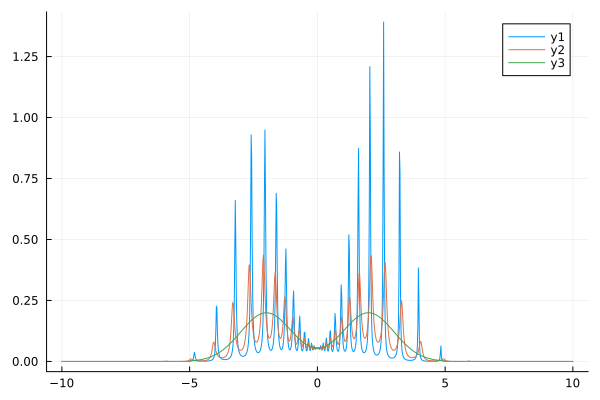

In [20]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.val))/pi)
#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.nev_st.reals.val))/pi)
#plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi)
plot!(omegas, rho.(omegas))